# Avocado Project

Avocado is a fruit consumed by people heavily in the United States.

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

The objective - The goal is to predict the average price which is continuous in nature of the different type of avocado and using the region that in which region they are lying.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Reading the dataset
df=pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


As seen above, we have an unnamed column that is simply a reflection of the index column. We shall proceed in removing the unnanmed column.

In [3]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [4]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.shape

(18249, 13)

The avocado dataset has 18249 rows and 13 columns

In [6]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

## About the Columns

1. Date - The date of the observation
2. AveragePrice - the average price of a single avocado
3. type - conventional or organic
4. year - the year
5. Region - the city or region of the observation
6. Total Volume - Total number of avocados sold
7. 4046 - Total number of avocados with PLU 4046 sold
8. 4225 - Total number of avocados with PLU 4225 sold
9. 4770 - Total number of avocados with PLU 4770 sold

In [7]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

The above table represents the type of data each column holds in the avocado dataset. 
Columns AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, XLarge Bags possess float datatype, while columns Date, Type and Region have string datatype. Column year possesses integer datatype.

## Understanding the Dataset via Visualizations

Let us check and see which year had the highest avacado average price 

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

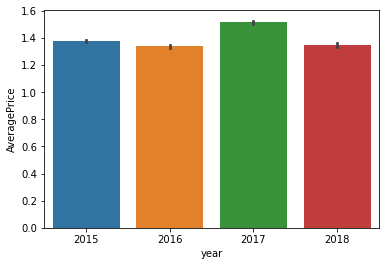

In [8]:
sb.barplot(x='year',y='AveragePrice', data=df)

As seen in the above graph, the highest avacado average price was in the year 2017

Let us understand the distribution of data in the columns present in the dataset

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

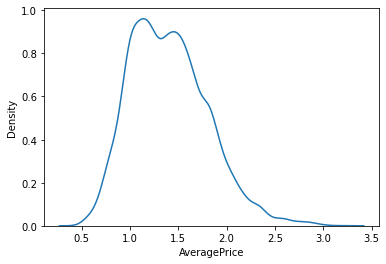

In [9]:
sb.kdeplot(df['AveragePrice'])

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

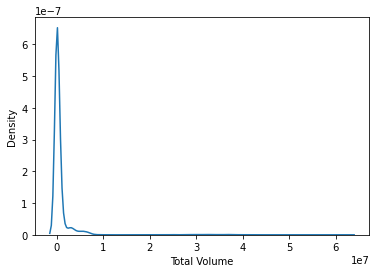

In [10]:
sb.kdeplot(df['Total Volume'])

<AxesSubplot:xlabel='4046', ylabel='Density'>

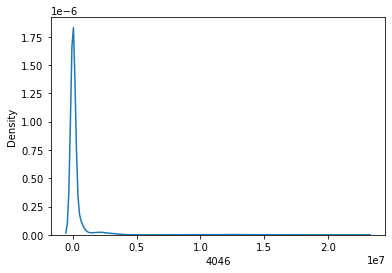

In [11]:
sb.kdeplot(df['4046'])

<AxesSubplot:xlabel='4225', ylabel='Density'>

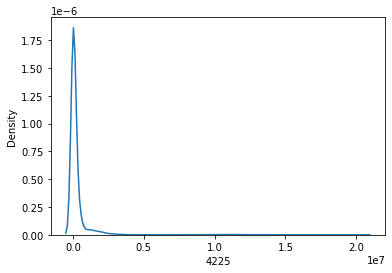

In [12]:
sb.kdeplot(df['4225'])

<AxesSubplot:xlabel='4770', ylabel='Density'>

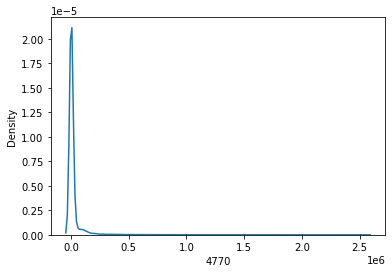

In [13]:
sb.kdeplot(df['4770'])

## Applying Label Encoder

For better and efficient machine learning, we shall employ label encoder to the columns that have string datatypes

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()
df["type"] = le.fit_transform(df["type"])
df["region"] = le.fit_transform(df["region"])

In [16]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


Also, since we cannot apply label encoder to the date column, as every value in that column is unique, we will have to drop the date column to improve the model.

Also, we shall be dropping the year column as it is redundant in further analysis.

In [17]:
df1=df.drop(['Date','year'], axis = 1)
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53


Now the dataset has 18249 rows and 11 columns

# EDA

Checking to see if the dataset consists of null values

In [18]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We can see that the dataset does not contain any null values in any of the columns

In [19]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


As seen in the above table, it is clear to note that some columns have a huge difference between the 75th percentile and the maximum value.
This is one of the signs that there might be outliers in the dataset.

Checking for skewness

In [20]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

As we can see in the above table, there is a lot of skewness present in the columns of the dataset.
We shall now proceed with reducing the skewness in the dataset.

In this approach, let us proceed with removing the skewness in columns which is outside the range of 0.55 using log1p transformation.

In [21]:
skew=("Total Volume","4046","4225","4770","Total Bags","Small Bags", "Large Bags", "XLarge Bags")
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

## Checking for outliers

In [22]:
from scipy.stats import zscore

AveragePrice       AxesSubplot(0.125,0.657941;0.110714x0.222059)
Total Volume    AxesSubplot(0.257857,0.657941;0.110714x0.222059)
4046            AxesSubplot(0.390714,0.657941;0.110714x0.222059)
4225            AxesSubplot(0.523571,0.657941;0.110714x0.222059)
4770            AxesSubplot(0.656429,0.657941;0.110714x0.222059)
Total Bags      AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Small Bags         AxesSubplot(0.125,0.391471;0.110714x0.222059)
Large Bags      AxesSubplot(0.257857,0.391471;0.110714x0.222059)
XLarge Bags     AxesSubplot(0.390714,0.391471;0.110714x0.222059)
type            AxesSubplot(0.523571,0.391471;0.110714x0.222059)
region          AxesSubplot(0.656429,0.391471;0.110714x0.222059)
dtype: object

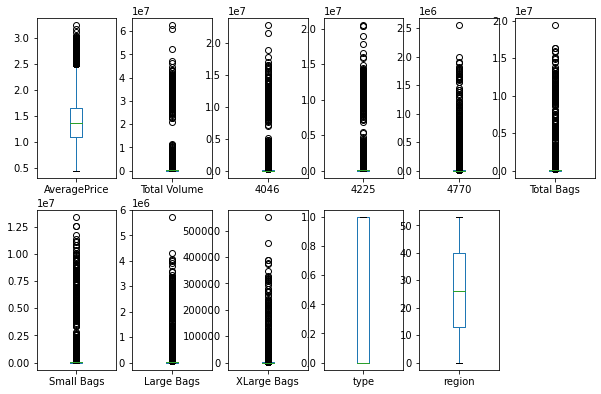

In [23]:
df1.plot(kind = "box",subplots = True, layout = (3,6), figsize = (10,10))

It is clear to see that many columns in the dataset have outliers. 

Columns such as AveragePrice, 4225, Total Bags, Small Bags and XLarge Bags all have outliers.
Lets proceed in removing the outliers in these columns. 

In [24]:
z=np.abs(zscore(df1))
z

array([[0.18868864, 0.22771641, 0.23081597, ..., 0.17557961, 0.99983562,
        1.7002522 ],
       [0.13901962, 0.23042664, 0.23110251, ..., 0.17557961, 0.99983562,
        1.7002522 ],
       [1.18206895, 0.21208462, 0.23100731, ..., 0.17557961, 0.99983562,
        1.7002522 ],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 0.17557961, 1.00016441,
        1.70081131],
       [1.30138182, 0.24162464, 0.2304279 , ..., 0.17557961, 1.00016441,
        1.70081131],
       [0.53151208, 0.24125273, 0.22934712, ..., 0.17557961, 1.00016441,
        1.70081131]])

In [25]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [26]:
df1corr = df1.corr()
df1corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000280


## Visualizing the correlation table

<AxesSubplot:>

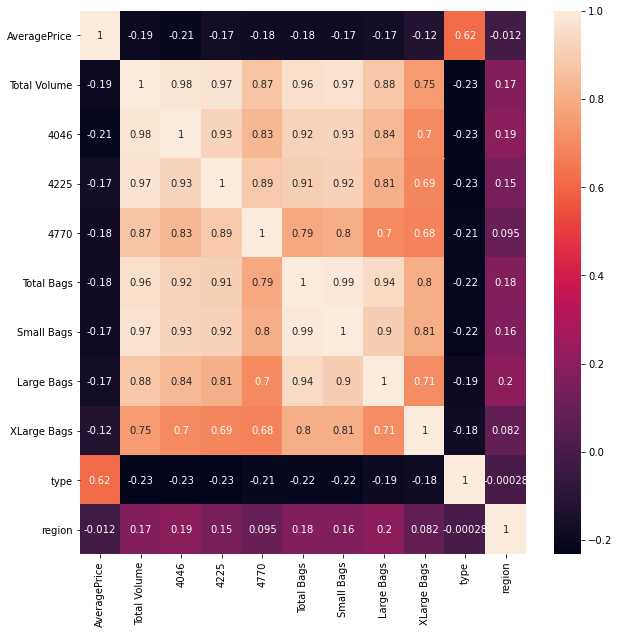

In [27]:
plt.figure(figsize = (10,10))
sb.heatmap(df1corr, annot = True)

Since none of the columns are heavily impacting the region column as observed above, we shall proceed with further analysis with the current dataset

In [28]:
df_new_1 = df1[(z<3).all(axis=1)]
df_new_1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53


As seen above, the dataset now reduces to 17834 rows and 11 columns after we remove the outliers

## Building a Predictive Model (for Region - Classification Problem)

Since finding the region is a classification problem, let us employ the available classification model and find out if the model predicts the outcome or not

In [29]:
#Splitting the Data into Training and Testing Parts
from sklearn.model_selection import train_test_split

In [30]:
X1 = df_new_1.drop('region', axis = 1)

In [31]:
print(X1)

       AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  
0         8603.62       

In [32]:
Y1 = df_new_1['region']

In [33]:
print(Y1)

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17651, dtype: int32


In [34]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=3)

### MultinomialNB

In [35]:
mnb=MultinomialNB()
mnb.fit(X1_train,Y1_train)
predmnb=mnb.predict(X1_test)

In [36]:
mnb.score(X1_train,Y1_train)

0.23604815864022663

In [37]:
print(accuracy_score(Y1_test,predmnb))

0.23845935995468706


In [38]:
print(confusion_matrix(Y1_test,predmnb))

[[16  0  0 ...  0  0  0]
 [ 3  9  0 ...  3  5  0]
 [ 0  0 37 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  3  0]
 [ 0  0  0 ... 11  7  0]
 [ 0  0  0 ...  8  1  4]]


In [39]:
print(classification_report(Y1_test,predmnb))

              precision    recall  f1-score   support

           0       0.11      0.27      0.15        59
           1       0.26      0.12      0.17        74
           2       0.70      0.49      0.57        76
           3       0.81      0.35      0.49        75
           4       0.34      0.15      0.21        66
           5       0.10      0.57      0.17        74
           6       0.10      0.13      0.11        54
           7       0.49      0.30      0.37        56
           8       0.73      0.48      0.58        75
           9       0.11      0.44      0.18        64
          10       0.50      0.04      0.08        67
          11       0.08      0.10      0.09        51
          12       0.32      0.50      0.39        60
          13       0.86      0.49      0.62        61
          14       0.32      0.26      0.29        54
          15       0.55      0.35      0.43        63
          16       0.39      0.46      0.42        72
          17       0.34    

From the above scores, confusion matrix and classification report, we see that MultinomialNB is not the best model to predict the region

### Support Vector Classifier

In [40]:
svc = SVC(kernel='rbf')
svc.fit(X1_train,Y1_train)
predsvc=svc.predict(X1_test)

In [41]:
svc.score(X1_train,Y1_train)

0.2827195467422096

In [42]:
print(accuracy_score(Y1_test,predsvc))

0.2732936845086378


In [43]:
print(confusion_matrix(Y1_test,predsvc))

[[51  0  0 ...  0  0  0]
 [33 18  0 ...  0  0  3]
 [25  0 32 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 11  0]
 [30  1  0 ...  0  0 18]]


In [44]:
print(classification_report(Y1_test,predsvc))

              precision    recall  f1-score   support

           0       0.04      0.86      0.07        59
           1       0.64      0.24      0.35        74
           2       0.94      0.42      0.58        76
           3       0.00      0.00      0.00        75
           4       0.68      0.32      0.43        66
           5       0.15      0.11      0.12        74
           6       0.83      0.44      0.58        54
           7       0.15      0.25      0.19        56
           8       1.00      0.41      0.58        75
           9       0.55      0.28      0.37        64
          10       0.21      0.13      0.16        67
          11       0.64      0.31      0.42        51
          12       0.70      0.43      0.54        60
          13       0.81      0.48      0.60        61
          14       0.19      0.30      0.23        54
          15       1.00      0.37      0.53        63
          16       0.55      0.17      0.26        72
          17       0.69    

Although Support Vector Classifier is better than MultinomialNB model, let us try and see how Decision Tree Classifier does

### Decision Tree Classifier

In [45]:
dtc=DecisionTreeClassifier()
dtc.fit(X1_train,Y1_train)
preddtc=dtc.predict(X1_test)

In [46]:
dtc.score(X1_train,Y1_train)

1.0

In [47]:
print(accuracy_score(Y1_test,preddtc))

0.7858963466440102


In [48]:
print(confusion_matrix(Y1_test,preddtc))

[[49  0  0 ...  0  0  0]
 [ 0 54  0 ...  0  0  1]
 [ 0  0 68 ...  0  0  1]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 41  0]
 [ 0  0  0 ...  0  0 41]]


In [49]:
print(classification_report(Y1_test,preddtc))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        59
           1       0.73      0.73      0.73        74
           2       0.96      0.89      0.93        76
           3       0.77      0.87      0.82        75
           4       0.89      0.83      0.86        66
           5       0.72      0.78      0.75        74
           6       0.95      0.98      0.96        54
           7       0.76      0.84      0.80        56
           8       0.94      0.89      0.92        75
           9       0.82      0.83      0.82        64
          10       0.73      0.60      0.66        67
          11       0.75      0.88      0.81        51
          12       0.87      0.80      0.83        60
          13       0.72      0.77      0.75        61
          14       0.73      0.74      0.73        54
          15       0.98      0.95      0.97        63
          16       0.87      0.81      0.83        72
          17       0.79    

Upto this point, it is clear that Decison Tree Classifier is the best possible model that we have found. 

However, since the dataset is quite large, let us now use Ensemble methods to see if we can further improve the quality of the model.

## Ensemble Methods

In [50]:
from sklearn.ensemble import RandomForestClassifier #Bagging Method

In [51]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X1_train,Y1_train)
predrfc=rfc.predict(X1_test)

In [52]:
rfc.score(X1_train,Y1_train)

1.0

In [53]:
print(accuracy_score(Y1_test,predrfc))

0.8926649674313226


In [54]:
print(confusion_matrix(Y1_test,predrfc))

[[51  0  0 ...  0  0  0]
 [ 0 60  0 ...  0  0  0]
 [ 0  0 76 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 45  0]
 [ 0  0  0 ...  0  0 47]]


In [55]:
print(classification_report(Y1_test,predrfc))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        59
           1       0.87      0.81      0.84        74
           2       0.99      1.00      0.99        76
           3       0.94      0.85      0.90        75
           4       0.94      0.97      0.96        66
           5       0.83      0.78      0.81        74
           6       0.98      1.00      0.99        54
           7       0.88      0.93      0.90        56
           8       1.00      0.96      0.98        75
           9       0.91      0.95      0.93        64
          10       0.81      0.76      0.78        67
          11       0.88      0.96      0.92        51
          12       0.92      0.97      0.94        60
          13       0.80      0.92      0.85        61
          14       0.84      0.98      0.91        54
          15       1.00      0.97      0.98        63
          16       0.94      0.92      0.93        72
          17       0.93    

As we can see from the scores of Random Forest Classifier, it is clear to note that ensemble methods are best to get a higher accuracy as compared to conventional Classification Models

Hence, to find the region, Random Forest Classifier is the best model to predict the region.

# Finding the Average Price (Regression Problem) 

## Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression

Rearranging the dataset to make efficient machine learning model

In [57]:
df_new_2 = df_new_1[["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags","type","region","AveragePrice"]]
df_new_2

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,AveragePrice
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,1.33
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,1.35
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0.93
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,1.08
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,1.28
...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53,1.63
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53,1.71
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53,1.87
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53,1.93


In [58]:
X2 = df_new_2.drop('AveragePrice', axis = 1)

In [59]:
Y2 = df_new_2['AveragePrice']

In [60]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=3)

In [61]:
lr=LinearRegression()
lr.fit(X2_train, Y2_train)
predlr = lr.predict(X2_test)

In [62]:
lr.score(X2_train,Y2_train)

0.4023535701194916

In [63]:
lr.coef_

array([ 1.87427229e-05, -1.88835875e-05, -1.86252589e-05, -1.93948346e-05,
       -1.58832590e-02,  1.58644720e-02,  1.58641850e-02,  1.58707582e-02,
        4.46699210e-01,  3.81236191e-04])

In [64]:
lr.intercept_

1.1832804689030794

As observed above, we see that Linear Regression might not be the best model to identify the AveragePrice of the avocados.

Let us now proceed with other available regression models.

## Decision Tree Regressor and Ada Boost Regressor

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

In [66]:
model = [DecisionTreeRegressor(),AdaBoostRegressor()]

max_r2score = 0
for r_state in range(20,40):
    X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,random_state=r_state,test_size=0.33)
    for i in model:
        i.fit(X2_train,Y2_train)
        pred = i.predict(X2_test)
        r2_sc=r2_score(Y2_test,pred)
        print("R2 Score corresponding to the random state ",r_state, "is ",r2_sc)
        if r2_sc>max_r2score:
            max_r2score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print()
print("Max R2 Score corresponding to random state ",final_state, "is ",max_r2score,"and model is", final_model )

R2 Score corresponding to the random state  20 is  0.6288706145347178
R2 Score corresponding to the random state  20 is  0.463561457715873
R2 Score corresponding to the random state  21 is  0.6221887068960974
R2 Score corresponding to the random state  21 is  0.4620510838645423
R2 Score corresponding to the random state  22 is  0.6068009449184666
R2 Score corresponding to the random state  22 is  0.45513243817632343
R2 Score corresponding to the random state  23 is  0.6034731479870816
R2 Score corresponding to the random state  23 is  0.43949001587628733
R2 Score corresponding to the random state  24 is  0.6083156433488227
R2 Score corresponding to the random state  24 is  0.45478738306487054
R2 Score corresponding to the random state  25 is  0.6074525292612469
R2 Score corresponding to the random state  25 is  0.4695253998881297
R2 Score corresponding to the random state  26 is  0.623520409199229
R2 Score corresponding to the random state  26 is  0.4498176351275598
R2 Score correspond

From the above loop, we can observe that the best possible model to find the price is Decision Tree Regressor at random state 29.

Let us proceed with building a predictive model. 

In [71]:
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,random_state=29,test_size=0.33)

In [72]:
dtr=DecisionTreeRegressor()
dtr.fit(X2_train, Y2_train)
preddtr = lr.predict(X2_test)

In [73]:
dtr.score(X2_train,Y2_train)

1.0

In [74]:
r2_score(Y2_test,preddtr)

0.41546244733675963